In [1]:
import numpy as np
import pandas as pd
import scipy as scp
import itertools as it
import seaborn as sns
import matplotlib.pyplot as plt

from sys_resolve_atoms import sys_resolve_atoms

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
def plot_freq_vs_massa(n, massas, ks, indice_variacao_massa, valor_variacao_massa, titulo):
    frequencias_data = []
    
    for m_val in valor_variacao_massa:
        massas_atuais = list(massas) # Cria uma cópia para não modificar a original
        massas_atuais[indice_variacao_massa] = m_val
        
        system = sys_resolve_atoms(n)
        system.create_matrix(m=massas_atuais, k=ks)
        
        # Obtém as frequências angulares (ω)
        frquencias_angulares = system.get_frequencia_angular()
        
        for i, freq in enumerate(frquencias_angulares):
            frequencias_data.append({
                f'Massa {indice_variacao_massa+1}': m_val,
                'Frequência Angular (ω)': freq,
                'Modo': f'Modo {i+1}'
            })
            
    df_freq = pd.DataFrame(frequencias_data)
    
    plt.figure()
    sns.lineplot(data=df_freq, x=f'Massa {indice_variacao_massa+1}', y='Frequência Angular (ω)', hue='Modo', marker='o')
    plt.title(titulo)
    plt.xlabel(f'Valor da Massa {indice_variacao_massa+1}')
    plt.ylabel('Frequência Angular (ω)')
    plt.legend(title='Modo de Vibração')
    plt.tight_layout()
    plt.savefig(f'frequencias_vs_massa_{n}_atoms.png')

In [3]:
def plot_modos_normais(n, massas, ks, titulo, filename):
    system = sys_resolve_atoms(n)
    system.create_matrix(m=massas, k=ks)
    
    autovetores = system.get_autovetores()
    frquencias_angulares = system.get_frequencia_angular()
    
    plt.figure(figsize=(12, 4 * n))
    
    for i in range(n):
        
        mode = autovetores[:, i]
        try :
            freq = frquencias_angulares[i]
        except IndexError:
            pass
        
        plt.subplot(n, 1, i + 1)
        plt.plot(range(1, n + 1), mode, 'o-')
        plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
        plt.title(f'Modo Normal {i+1} (ω = {freq:.2f} rad/s)')
        plt.xlabel('Átomo')
        plt.ylabel('Amplitude Relativa')
        plt.xticks(range(1, n + 1))
        plt.grid(True)
        
    plt.tight_layout()
    plt.savefig(filename)
    # plt.close()

In [4]:
df_tot = pd.DataFrame()

In [5]:
n = 100
m1 = n*[1]
m2 = []
k = (n-1)*[1.0]
for i in range(1, n+1):
    if i%3 == 1:
        m2.append(1.0)
    elif i%3 == 2:
        m2.append(3.0)
    else:
        m2.append(5.0)

n1_sys100 = sys_resolve_atoms(n)
n1_sys100.create_matrix( m1, k, type = 'linear')
n1_freq100 = n1_sys100.get_frequencia_angular()
n1_autovalores100 = n1_sys100.get_autovalores()
n1_autovetores100 = n1_sys100.get_autovetores()

n2_sys100 = sys_resolve_atoms(n)
n2_sys100.create_matrix( m2, k, type = 'linear')
n2_freq100 = n2_sys100.get_frequencia_angular()
n2_autovalores100 = n2_sys100.get_autovalores()
n2_autovetores100 = n2_sys100.get_autovetores()

df1 = pd.DataFrame()

df1['Frequência Angular (ω)'] = list(n1_freq100)+list(n2_freq100)
df1['Tipo de Massa'] = ['Homogênea']*len(n1_freq100) + ['Ternária']*len(n2_freq100)

# sns.histplot(df1, x ='Frequência Angular (ω)', hue='Tipo de Massa' , kde=True, bins=10)

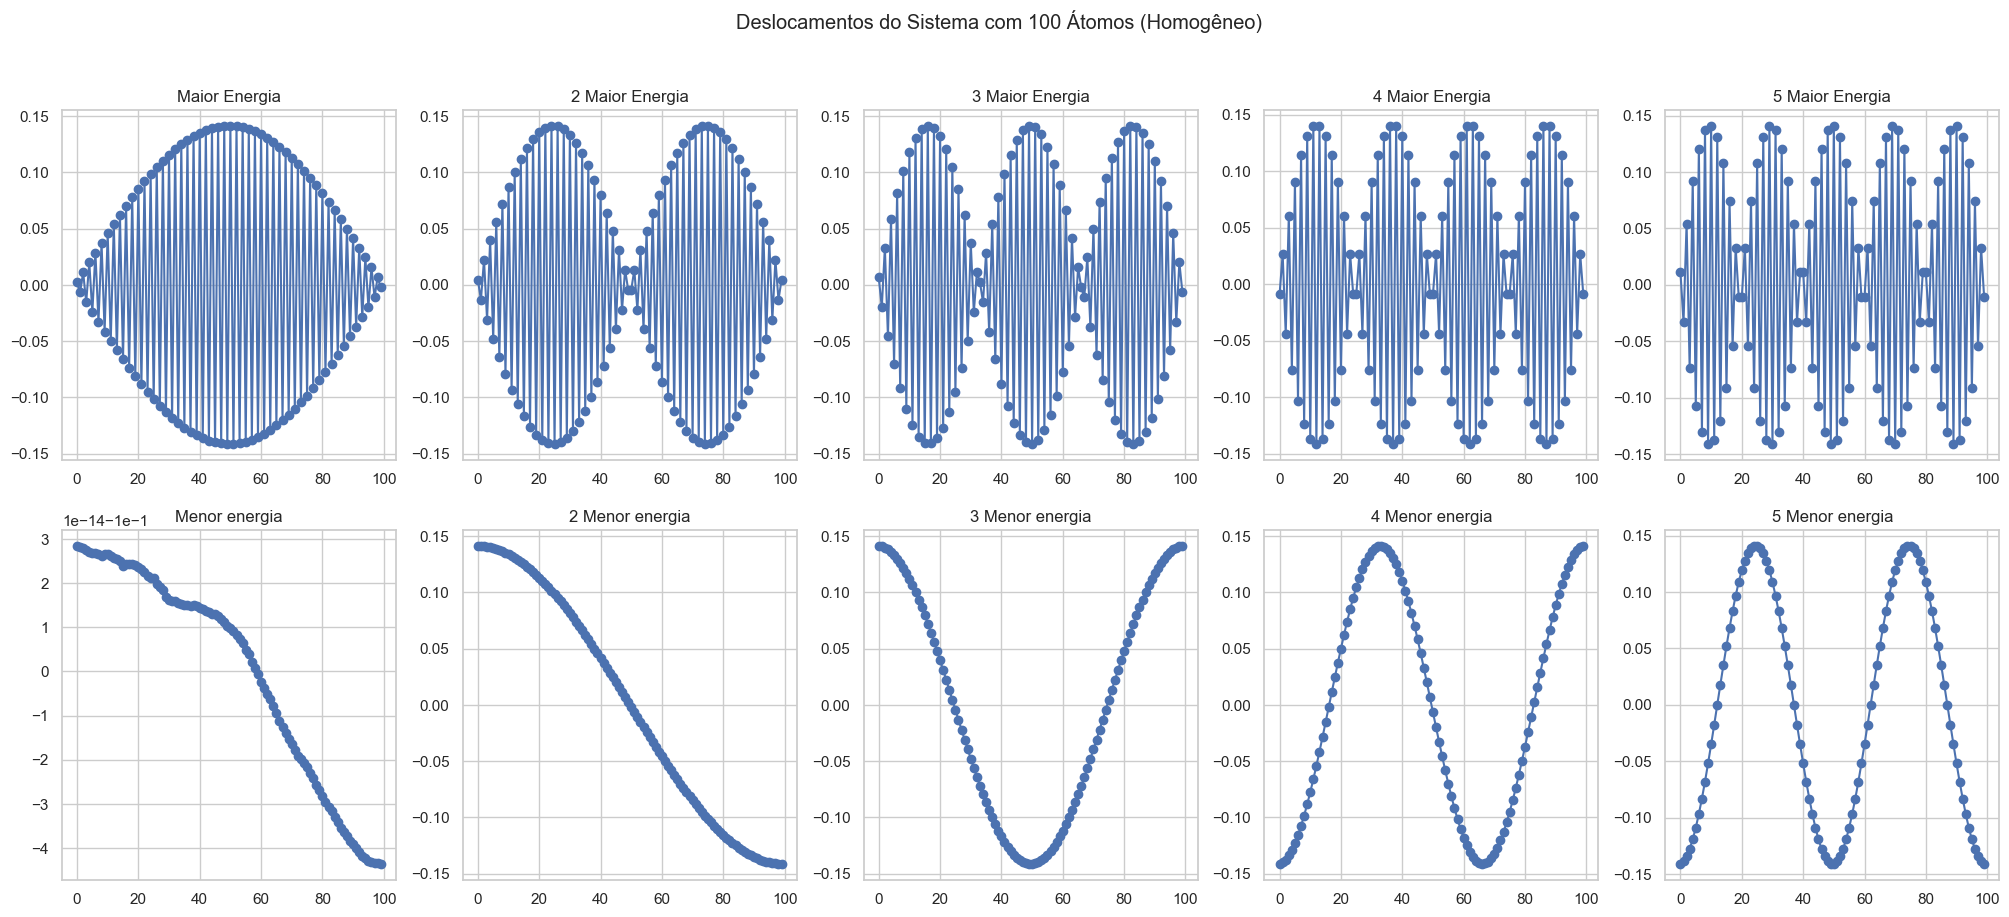

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(25, 10))
plt.suptitle("Deslocamentos do Sistema com 100 Átomos (Homogêneo)")

ax[0,0].plot(n1_autovetores100[:, -1],"o-", label = "Maior energia")
ax[0,0].set_title("Maior Energia")

ax[0,1].plot(n1_autovetores100[:, -2],"o-", label = "2 Maior energia")
ax[0,1].set_title("2 Maior Energia")

ax[0,2].plot(n1_autovetores100[:, -3],"o-", label = "3 Maior energia")
ax[0,2].set_title("3 Maior Energia")

ax[0,3].plot(n1_autovetores100[:, -4],"o-", label = "4 Maior energia")
ax[0,3].set_title("4 Maior Energia")

ax[0,4].plot(n1_autovetores100[:, -5],"o-", label = "5 Maior energia")
ax[0,4].set_title("5 Maior Energia")


ax[1,0].plot(n1_autovetores100[:, 0],"o-", label = "Menor energia")
ax[1,0].set_title("Menor energia")

ax[1,1].plot(n1_autovetores100[:, 1],"o-", label = "2 Menor energia")
ax[1,1].set_title("2 Menor energia")

ax[1,2].plot(n1_autovetores100[:, 2],"o-", label = "3 Menor energia")
ax[1,2].set_title("3 Menor energia")

ax[1,3].plot(n1_autovetores100[:, 3],"o-", label = "4 Menor energia")
ax[1,3].set_title("4 Menor energia")

ax[1,4].plot(n1_autovetores100[:, 4],"o-", label = "5 Menor energia")
ax[1,4].set_title("5 Menor energia")



plt.show()

In [9]:
def plot_ternaria(x,j, y, title):
    cores = ['orange', 'blue', 'green']
    for i, valor in enumerate(y):
        ax[x,j].plot(i, valor, 'o', color=cores[i % len(cores)])  # Ponto
        if i < len(y) - 1:  # Linha conectando os pontos
            ax[x,j].plot([i, i+1], [valor, y[i+1]], color='gray', alpha=0.5)

    ax[x,j].set_title(title)

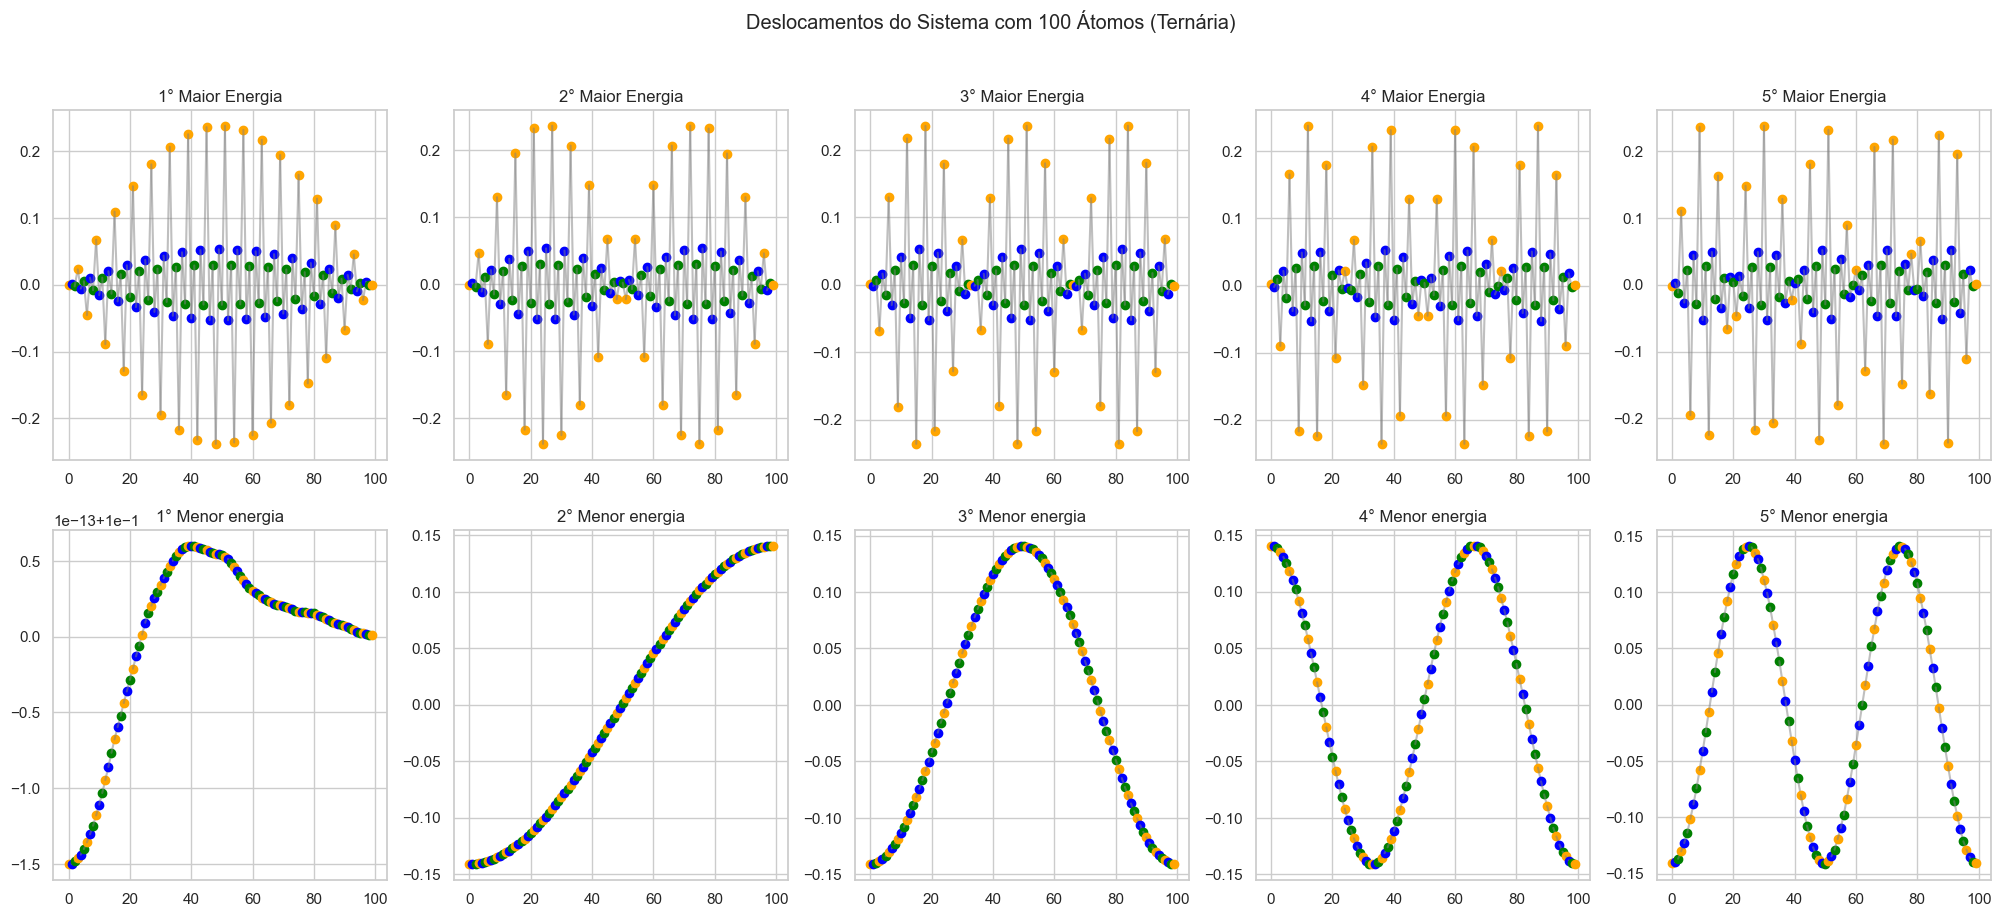

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(25, 10))
plt.suptitle("Deslocamentos do Sistema com 100 Átomos (Ternária)")

plot_ternaria(0,0, n2_autovetores100[:, -1], "1° Maior Energia")
plot_ternaria(0,1, n2_autovetores100[:, -2], "2° Maior Energia")
plot_ternaria(0,2, n2_autovetores100[:, -3], "3° Maior Energia")
plot_ternaria(0,3, n2_autovetores100[:, -4], "4° Maior Energia")
plot_ternaria(0,4, n2_autovetores100[:, -5], "5° Maior Energia")
# ax[0,0].plot(n2_autovetores100[:, -1],"o-", label = "Maior energia")
# ax[0,0].set_title("Maior Energia")

# ax[0,1].plot(n2_autovetores100[:, -2],"o-", label = "2 Maior energia")
# ax[0,1].set_title("2 Maior Energia")

# ax[0,2].plot(n2_autovetores100[:, -3],"o-", label = "3 Maior energia")
# ax[0,2].set_title("3 Maior Energia")

# ax[0,3].plot(n2_autovetores100[:, -4],"o-", label = "4 Maior energia")
# ax[0,3].set_title("4 Maior Energia")

# ax[0,4].plot(n2_autovetores100[:, -5],"o-", label = "5 Maior energia")
# ax[0,4].set_title("5 Maior Energia")

plot_ternaria(1,0, n2_autovetores100[:, 0], "1° Menor energia")
plot_ternaria(1,1, n2_autovetores100[:, 1], "2° Menor energia")
plot_ternaria(1,2, n2_autovetores100[:, 2], "3° Menor energia")
plot_ternaria(1,3, n2_autovetores100[:, 3], "4° Menor energia")
plot_ternaria(1,4, n2_autovetores100[:, 4   ], "5° Menor energia")
# ax[1,0].plot(n2_autovetores100[:, 0],"o-", label = "Menor energia")
# ax[1,0].set_title("Menor energia")

# ax[1,1].plot(n2_autovetores100[:, 1],"o-", label = "2 Menor energia")
# ax[1,1].set_title("2 Menor energia")

# ax[1,2].plot(n2_autovetores100[:, 2],"o-", label = "3 Menor energia")
# ax[1,2].set_title("3 Menor energia")

# ax[1,3].plot(n2_autovetores100[:, 3],"o-", label = "4 Menor energia")
# ax[1,3].set_title("4 Menor energia")

# ax[1,4].plot(n2_autovetores100[:, 4],"o-", label = "5 Menor energia")
# ax[1,4].set_title("5 Menor energia")



plt.show()

Text(0.5, 1.0, '10000 átomos')

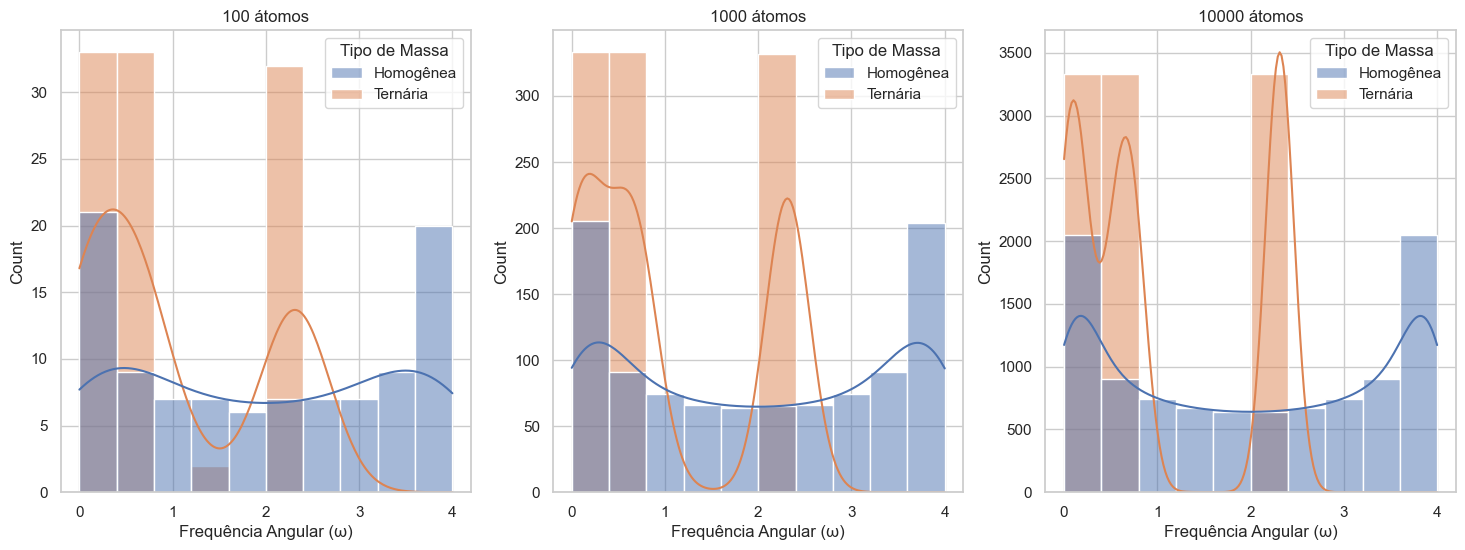

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6), nrows=1, ncols=3)
sns.histplot(df1, x ='Frequência Angular (ω)', hue='Tipo de Massa' , kde=True, bins=10, ax=ax[0])
# sns.histplot(df2, x ='Frequência Angular (ω)', hue='Tipo de Massa' , kde=True, bins=10, ax=ax[1])
# sns.histplot(df3, x ='Frequência Angular (ω)', hue='Tipo de Massa' , kde=True, bins=10, ax=ax[2])

ax[0].set_title('100 átomos')
# ax[1].set_title('1000 átomos')      
# ax[2].set_title('10000 átomos')